In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install scikit-learn
!pip install scikit-optimize

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics.pairwise import rbf_kernel, linear_kernel
from skopt import BayesSearchCV
from time import time

## 1 . Data Preprocessing and Exploration


In [92]:
# Create HIGGS_sample from HIGGS dataset; to do later

In [93]:
# Load HIGGS_sample

filepath = "/content/HIGGS_sample.csv"
read_data = pd.read_csv(filepath)
data = read_data.drop(columns=['1.000000000000000000e+00'])
target = read_data['1.000000000000000000e+00']

### 1.1 Exploratory Data Analysis (EDA)


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   8.692932128906250000e-01    110000 non-null  float64
 1   -6.350818276405334473e-01   110000 non-null  float64
 2   2.256902605295181274e-01    110000 non-null  float64
 3   3.274700641632080078e-01    110000 non-null  float64
 4   -6.899932026863098145e-01   110000 non-null  float64
 5   7.542022466659545898e-01    110000 non-null  float64
 6   -2.485731393098831177e-01   110000 non-null  float64
 7   -1.092063903808593750e+00   110000 non-null  float64
 8   0.000000000000000000e+00    110000 non-null  float64
 9   1.374992132186889648e+00    110000 non-null  float64
 10  -6.536741852760314941e-01   110000 non-null  float64
 11  9.303491115570068359e-01    110000 non-null  float64
 12  1.107436060905456543e+00    110000 non-null  float64
 13  1.138904333114

In [95]:
data.describe()  # summary statistics

,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,1.374992132186889648e+00,...,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475875854492e-01
count,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,...,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000
mean,0.993285,-0.005985,-0.002650,0.998366,0.001416,0.990549,0.003786,-0.006673,1.004337,0.992307,...,-0.000581,0.000222,0.994672,1.032670,1.025995,1.050662,1.011109,0.975567,1.034330,0.961325
std,0.569758,1.007981,1.004571,0.603324,1.007990,0.476472,1.012672,1.007398,1.027857,0.496715,...,1.009341,1.005146,1.399653,0.674207,0.382991,0.162497,0.399684,0.527061,0.366120,0.315269
min,0.274697,-2.434976,-1.742508,0.001690,-1.743932,0.157473,-2.969725,-1.741237,0.000000,0.189359,...,-2.497265,-1.742691,0.000000,0.101603,0.297987,0.234146,0.292503,0.067156,0.340333,0.370761
25%,0.591119,-0.746114,-0.872486,0.575659,-0.871000,0.679084,-0.687245,-0.879738,0.000000,0.657342,...,-0.710026,-0.870924,0.000000,0.789034,0.846460,0.985767,0.769028,0.675868,0.820544,0.771713
50%,0.852639,-0.007846,-0.003570,0.889777,0.000287,0.894270,0.005916,-0.008257,1.086538,0.892278,...,-0.002959,-0.001374,0.000000,0.894816,0.951576,0.989783,0.916808,0.874679,0.948435,0.873488
75%,1.238789,0.734318,0.864890,1.291532,0.877119,1.167351,0.692145,0.861660,2.173076,1.204141,...,0.715767,0.869941,3.101961,1.025956,1.084873,1.021725,1.144072,1.139780,1.141846,1.059154
max,8.790659,2.434868,1.743236,11.531485,1.743257,7.419452,2.966703,1.741454,2.173076,7.464693,...,2.498009,1.743372,3.101961,18.002125,9.153964,3.954101,8.140121,8.835245,6.775816,5.111963


In [96]:
data.nunique()  # number of unique values in each column

,0
8.692932128906250000e-01,13435
-6.350818276405334473e-01,4934
2.256902605295181274e-01,6284
3.274700641632080078e-01,103448
-6.899932026863098145e-01,103560
7.542022466659545898e-01,21082
-2.485731393098831177e-01,5768
-1.092063903808593750e+00,6284
0.000000000000000000e+00,3
1.374992132186889648e+00,16990


In [97]:
data.isnull().sum()  # number of missing values in each column

,0
8.692932128906250000e-01,0
-6.350818276405334473e-01,0
2.256902605295181274e-01,0
3.274700641632080078e-01,0
-6.899932026863098145e-01,0
7.542022466659545898e-01,0
-2.485731393098831177e-01,0
-1.092063903808593750e+00,0
0.000000000000000000e+00,0
1.374992132186889648e+00,0


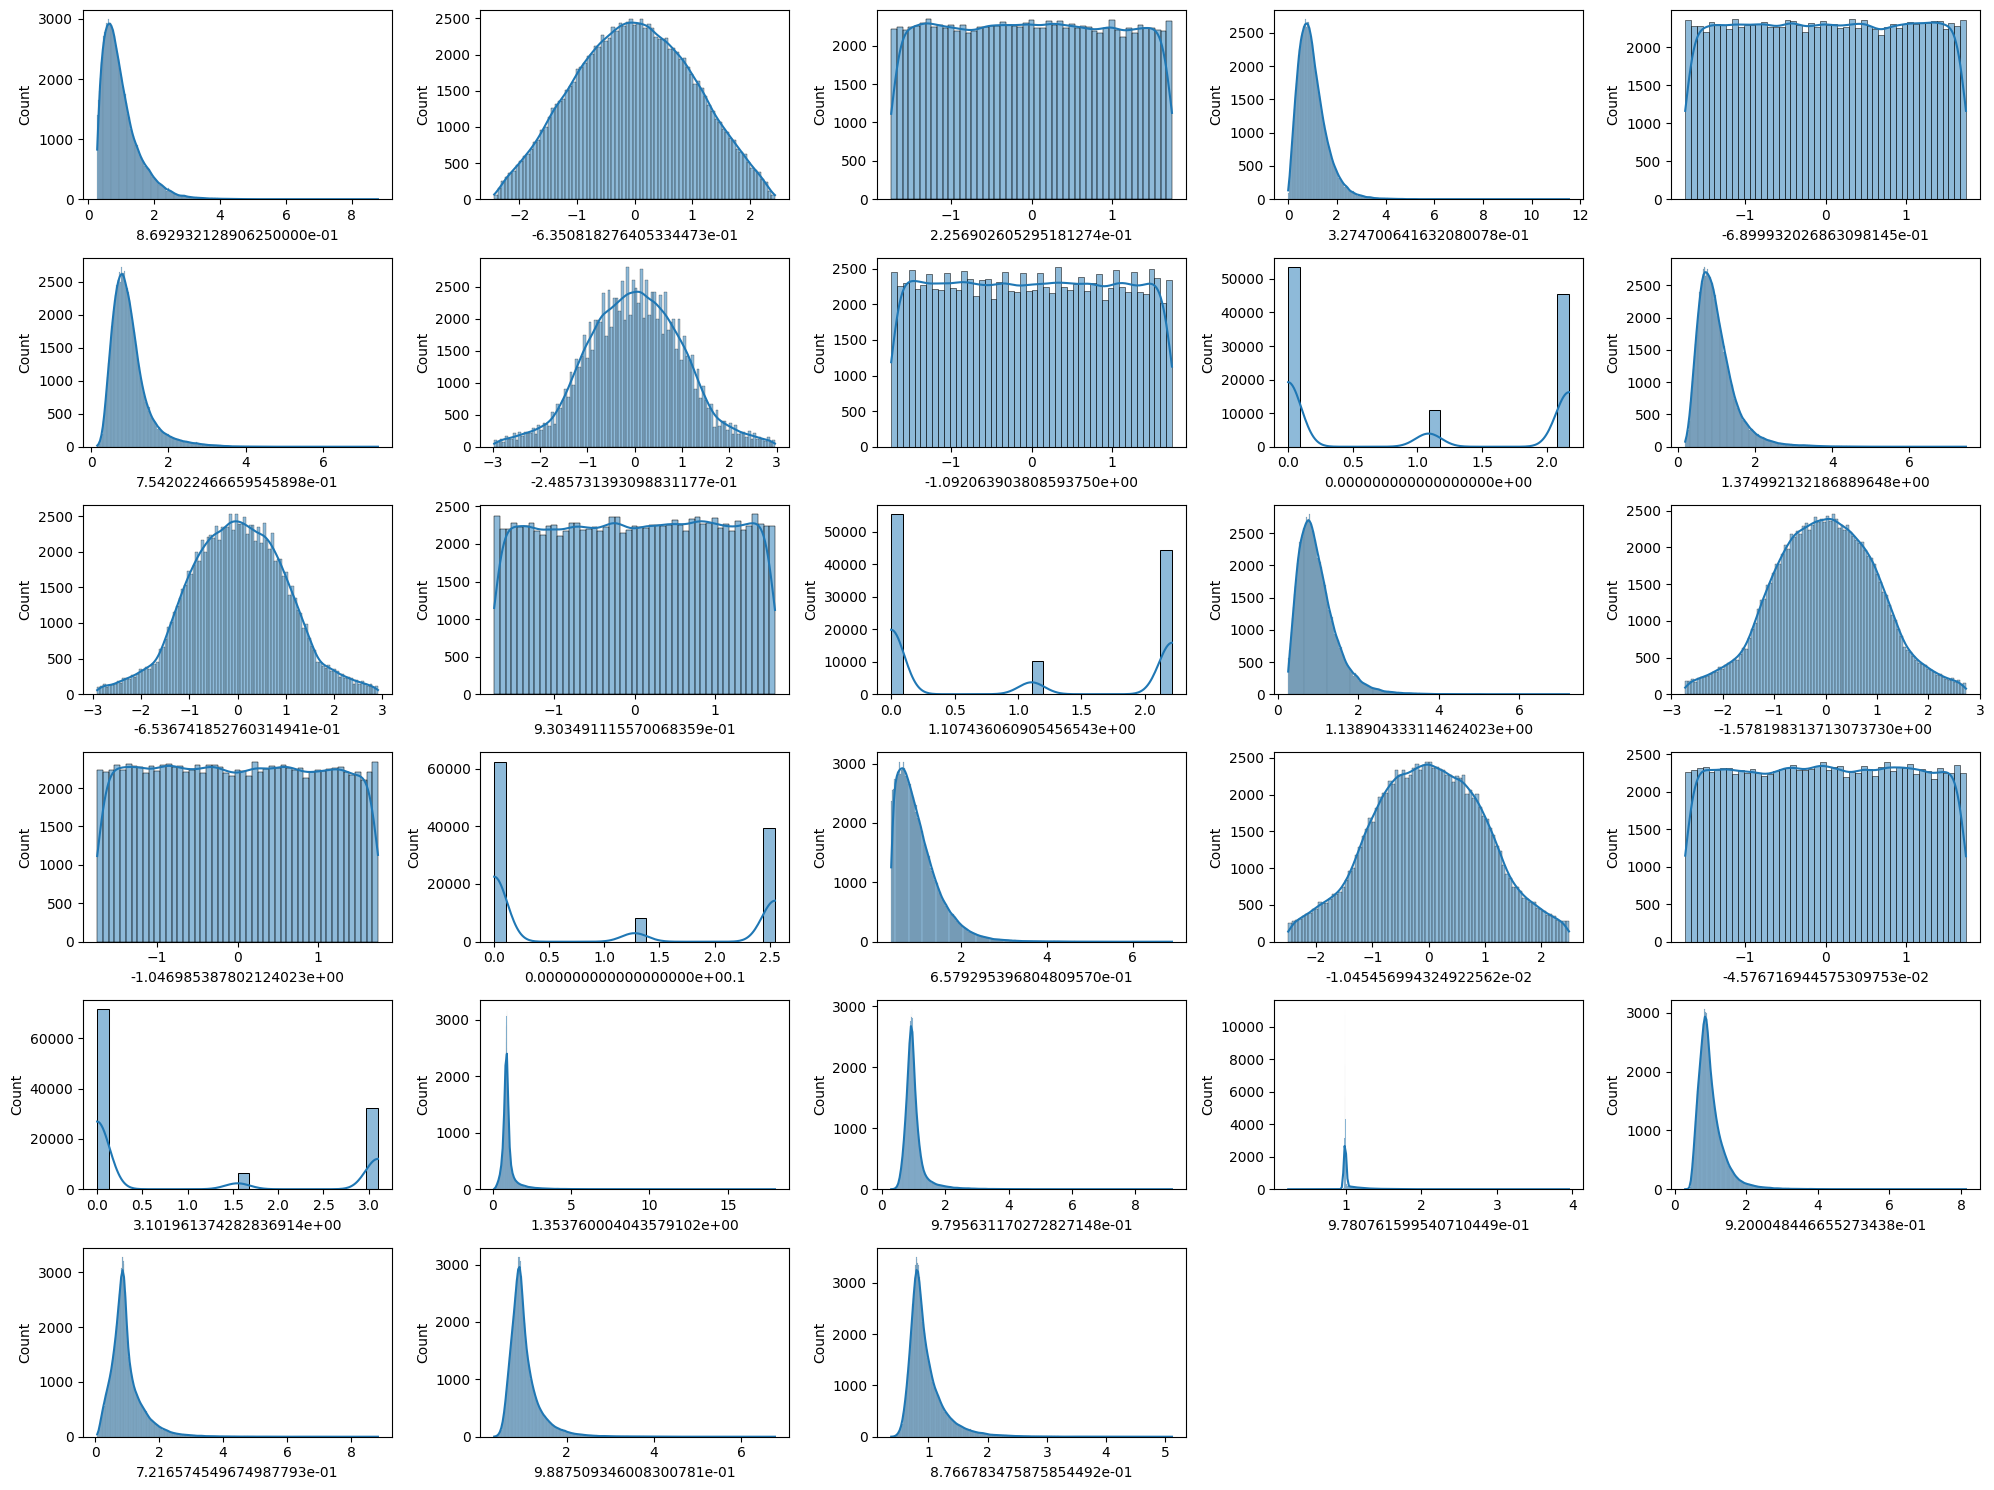

In [98]:
def beautiful_plot(df):
    plt.figure(figsize=(20, 15))
    rows, cols = (df.shape[1] + 4) // 5, 5

    for idx, column in enumerate(df.columns):
        plt.subplot(rows, cols, idx + 1)
        sns.histplot(df[column], kde=True)

    plt.tight_layout()
    plt.show()


beautiful_plot(data)

In [99]:
print(f"Shape before removing outliers: {data.shape}")

outliers = {}
outlier_indices = set()

for column in data.columns:
    skewness = data[column].skew()

    if abs(skewness) < 0.5:  # Approximately normal - Use Z-score
        threshold = 4
        z_scores = zscore(data[column].dropna())
        outliers[column] = data[column][np.abs(z_scores) > threshold]
        outlier_indices.update(outliers[column].index)
        print(f"{column}: Z-score method detected {len(outliers[column])} outliers")
    else:  # Skewed or non-normal - Use IQR
        threshold = 4.5
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers[column] = data[column][
            (data[column] < Q1 - threshold * IQR) | (data[column] > Q3 + threshold * IQR)
        ]
        outlier_indices.update(outliers[column].index)
        print(f"{column}: IQR method detected {len(outliers[column])} outliers")

# Remove rows with outliers
data_cleaned = data.drop(index=outlier_indices)
target = target.drop(index=outlier_indices)
print(f"Shape after removing outliers: {data_cleaned.shape}")

Shape before removing outliers: (110000, 28)
8.692932128906250000e-01: IQR method detected 161 outliers
-6.350818276405334473e-01: Z-score method detected 0 outliers
2.256902605295181274e-01: Z-score method detected 0 outliers
3.274700641632080078e-01: IQR method detected 114 outliers
-6.899932026863098145e-01: Z-score method detected 0 outliers
7.542022466659545898e-01: IQR method detected 281 outliers
-2.485731393098831177e-01: Z-score method detected 0 outliers
-1.092063903808593750e+00: Z-score method detected 0 outliers
0.000000000000000000e+00: Z-score method detected 0 outliers
1.374992132186889648e+00: IQR method detected 224 outliers
-6.536741852760314941e-01: Z-score method detected 0 outliers
9.303491115570068359e-01: Z-score method detected 0 outliers
1.107436060905456543e+00: Z-score method detected 0 outliers
1.138904333114624023e+00: IQR method detected 120 outliers
-1.578198313713073730e+00: Z-score method detected 0 outliers
-1.046985387802124023e+00: Z-score method de

### 1.2 Data Normalization/Standardization

"Input features were standardized over the entire train/test set with mean zero and standard deviation one, except for those features with values strictly greater than zero – these we scaled so that the mean value was one."
~ [Searching for Exotic Particles in High-Energy Physics with Deep Learning](https://arxiv.org/pdf/1402.4735)


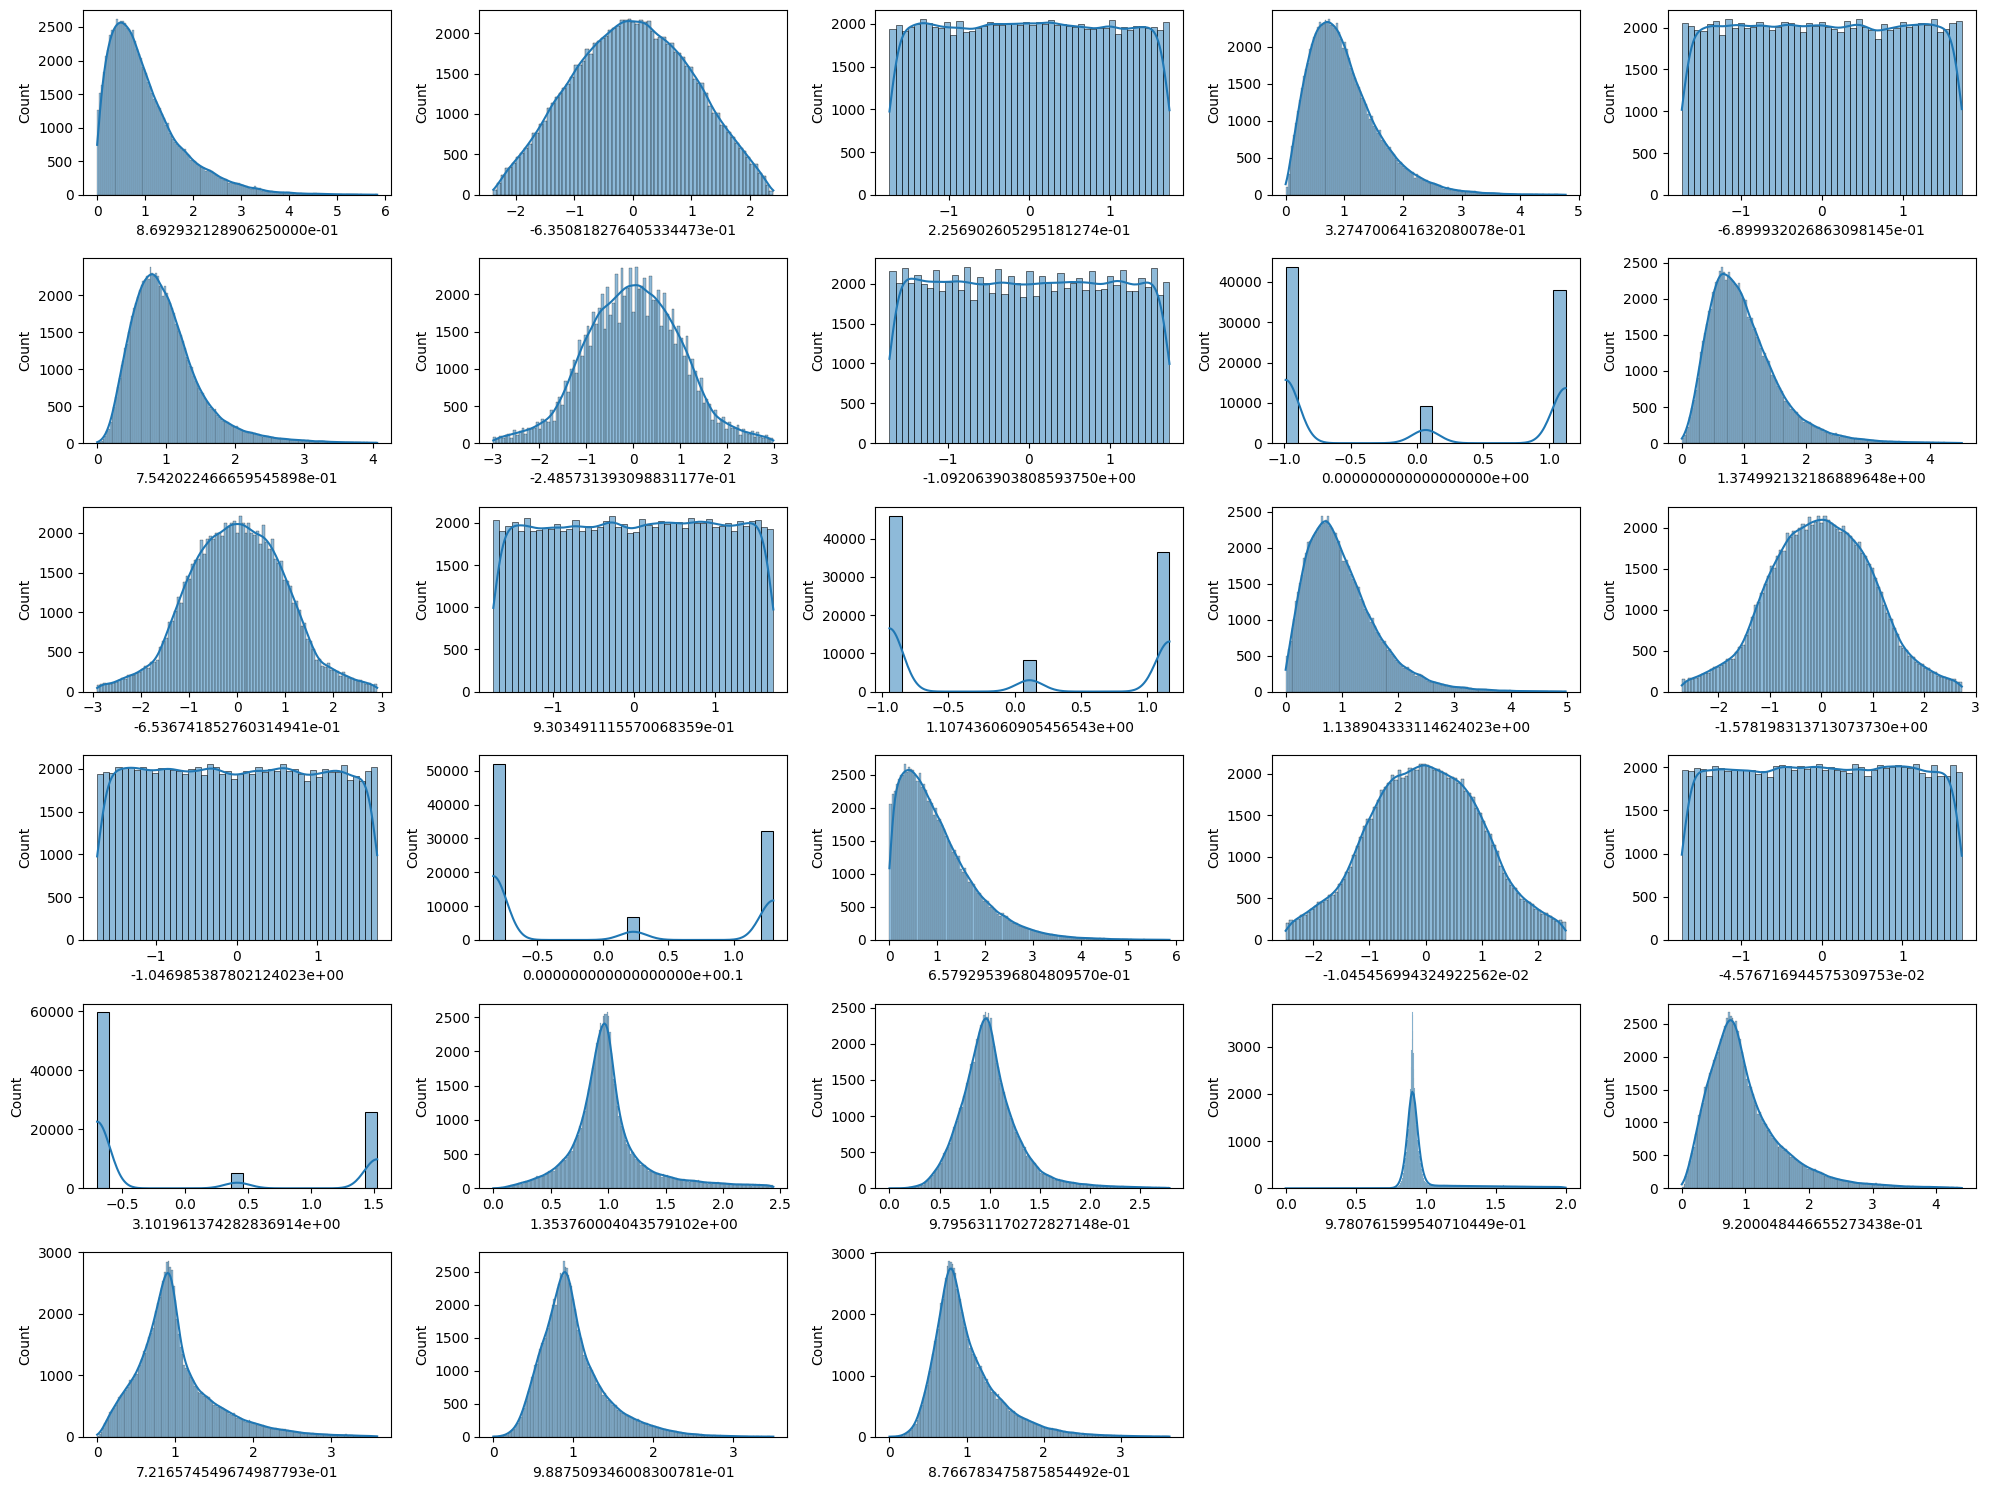

In [100]:
# Identify columns with strictly positive values
positive_only_columns = [col for col in data_cleaned.columns if (data_cleaned[col] > 0).all()]

# Separate data into positive-only and other columns
data_positive_only = data_cleaned[positive_only_columns]
data_other = data_cleaned.drop(columns=positive_only_columns)

# Standardize columns with both positive and negative values
scaler = StandardScaler()
data_other_scaled = scaler.fit_transform(data_other)
data_other_scaled = pd.DataFrame(data_other_scaled, columns=data_other.columns)

# Scale positive-only columns so the mean is 1
scaler_positive = MinMaxScaler()
data_positive_only_scaled = scaler_positive.fit_transform(data_positive_only)
data_positive_only_scaled = pd.DataFrame(
    data_positive_only_scaled, columns=data_positive_only.columns
)
data_positive_only_scaled = data_positive_only_scaled * (
    1 / data_positive_only_scaled.mean()
)

# Combine both scaled parts back into a single DataFrame
data_scaled = pd.concat([data_other_scaled, data_positive_only_scaled], axis=1)
data_scaled = data_scaled[data.columns]  # Reorder columns to match original data order

# Plot the histograms of each feature
beautiful_plot(data_scaled)

### 1.3 Feature Engineering

In [101]:
# Generate only interaction terms (no powers)
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_features = interaction.fit_transform(data_scaled)

# Convert to DataFrame
interaction_feature_names = interaction.get_feature_names_out(data_scaled.columns)
data_interactions = pd.DataFrame(interaction_features, columns=interaction_feature_names)

data_interactions.describe()

,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,1.374992132186889648e+00,...,9.780761599540710449e-01 9.200048446655273438e-01,9.780761599540710449e-01 7.216574549674987793e-01,9.780761599540710449e-01 9.887509346008300781e-01,9.780761599540710449e-01 8.766783475875854492e-01,9.200048446655273438e-01 7.216574549674987793e-01,9.200048446655273438e-01 9.887509346008300781e-01,9.200048446655273438e-01 8.766783475875854492e-01,7.216574549674987793e-01 9.887509346008300781e-01,7.216574549674987793e-01 8.766783475875854492e-01,9.887509346008300781e-01 8.766783475875854492e-01
count,90806.000000,9.080600e+04,9.080600e+04,90806.000000,9.080600e+04,90806.000000,9.080600e+04,9.080600e+04,9.080600e+04,90806.000000,...,90806.000000,90806.000000,90806.000000,90806.000000,90806.000000,90806.000000,90806.000000,90806.000000,90806.000000,90806.000000
mean,1.000000,-3.378376e-17,-3.975020e-17,1.000000,-1.961101e-17,1.000000,-2.190956e-18,-9.155067e-18,1.271537e-17,1.000000,...,0.998369,1.000321,0.997546,0.996855,1.080599,1.151529,1.149244,1.125678,1.089724,1.154710
std,0.778134,1.000006e+00,1.000006e+00,0.609109,1.000006e+00,0.523561,1.000006e+00,1.000006e+00,1.000006e+00,0.574953,...,0.658397,0.584103,0.475913,0.489261,1.071257,1.226633,1.226803,1.038903,0.967276,1.069044
min,0.000000,-2.382812e+00,-1.733973e+00,0.000000,-1.731383e+00,0.000000,-2.980971e+00,-1.718117e+00,-9.910219e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.439356,-7.381051e-01,-8.641908e-01,0.561074,-8.651126e-01,0.643353,-6.840565e-01,-8.701994e-01,-9.910219e-01,0.597515,...,0.562801,0.649022,0.692546,0.676188,0.422782,0.450788,0.446658,0.514432,0.518347,0.534068
50%,0.806130,-1.333998e-03,-4.844752e-04,0.886564,-3.305156e-03,0.907242,2.731921e-03,-1.675879e-03,6.560424e-02,0.893652,...,0.831991,0.866486,0.888079,0.869129,0.794539,0.798107,0.778282,0.844253,0.810205,0.819957
75%,1.347873,7.373496e-01,8.644271e-01,1.308287,8.683005e-01,1.231931,6.775935e-01,8.632384e-01,1.122230e+00,1.274633,...,1.267068,1.224026,1.196739,1.201264,1.368449,1.366023,1.363035,1.350043,1.318000,1.373642
max,5.833056,2.398312e+00,1.737525e+00,4.776320,1.729659e+00,4.057852,2.977490e+00,1.733545e+00,1.122230e+00,4.510027,...,7.661646,6.577917,6.819780,6.626078,15.206025,14.127159,15.249997,11.772499,11.081481,12.543540


In [102]:
# Combine original and interaction features
data_engineered = pd.concat([data_scaled, data_interactions], axis=1)

### 1.4 Feature Selection

In [103]:
# Check for duplicate column names in the data_engineered DataFrame
duplicate_columns = data_engineered.columns[data_engineered.columns.duplicated()]

# Remove duplicates
data_engineered = data_engineered.loc[:, ~data_engineered.columns.duplicated()]

data_engineered.columns

Index(['8.692932128906250000e-01', '-6.350818276405334473e-01',
       '2.256902605295181274e-01', '3.274700641632080078e-01',
       '-6.899932026863098145e-01', '7.542022466659545898e-01',
       '-2.485731393098831177e-01', '-1.092063903808593750e+00',
       '0.000000000000000000e+00', '1.374992132186889648e+00',
       ...
       '9.780761599540710449e-01 9.200048446655273438e-01',
       '9.780761599540710449e-01 7.216574549674987793e-01',
       '9.780761599540710449e-01 9.887509346008300781e-01',
       '9.780761599540710449e-01 8.766783475875854492e-01',
       '9.200048446655273438e-01 7.216574549674987793e-01',
       '9.200048446655273438e-01 9.887509346008300781e-01',
       '9.200048446655273438e-01 8.766783475875854492e-01',
       '7.216574549674987793e-01 9.887509346008300781e-01',
       '7.216574549674987793e-01 8.766783475875854492e-01',
       '9.887509346008300781e-01 8.766783475875854492e-01'],
      dtype='object', length=406)

In [104]:
select_kbest = SelectKBest(score_func=f_classif, k=20)
select_kbest.fit(data_engineered, target)

# Get the selected features
selected_features_kbest = data_engineered.columns[select_kbest.get_support()]
data_reduced = data_engineered[list(selected_features_kbest)]
print(f"Shape of reduced data: {data_reduced.shape}")
data_reduced.describe()

Shape of reduced data: (90806, 20)


,3.274700641632080078e-01,7.216574549674987793e-01,8.766783475875854492e-01,8.692932128906250000e-01 7.216574549674987793e-01,8.692932128906250000e-01 8.766783475875854492e-01,3.274700641632080078e-01 9.780761599540710449e-01,3.274700641632080078e-01 7.216574549674987793e-01,3.274700641632080078e-01 9.887509346008300781e-01,3.274700641632080078e-01 8.766783475875854492e-01,1.374992132186889648e+00 7.216574549674987793e-01,1.138904333114624023e+00 7.216574549674987793e-01,1.353760004043579102e+00 7.216574549674987793e-01,1.353760004043579102e+00 8.766783475875854492e-01,9.795631170272827148e-01 7.216574549674987793e-01,9.780761599540710449e-01 7.216574549674987793e-01,9.780761599540710449e-01 8.766783475875854492e-01,9.200048446655273438e-01 7.216574549674987793e-01,7.216574549674987793e-01 9.887509346008300781e-01,7.216574549674987793e-01 8.766783475875854492e-01,9.887509346008300781e-01 8.766783475875854492e-01
count,90806.000000,90806.000000,90806.000000,90806.000000,90806.000000,90806.000000,90806.000000,90806.000000,90806.000000,90806.000000,90806.000000,90806.000000,90806.000000,90806.000000,90806.000000,90806.000000,90806.000000,90806.000000,90806.000000,90806.000000
mean,1.000000,1.000000,1.000000,0.990728,1.036479,1.019982,0.994453,1.051674,1.079577,1.093755,1.080522,0.996963,1.028253,1.024161,1.000321,0.996855,1.080599,1.125678,1.089724,1.154710
std,0.609109,0.518635,0.436085,1.028818,1.114477,0.704011,0.873036,0.955458,1.048623,1.093170,1.115275,0.640949,0.665101,0.696009,0.584103,0.489261,1.071257,1.038903,0.967276,1.069044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.561074,0.685937,0.718131,0.344710,0.369041,0.520890,0.432224,0.455245,0.442242,0.426533,0.387967,0.591648,0.620382,0.578754,0.649022,0.676188,0.422782,0.514432,0.518347,0.534068
50%,0.886564,0.910703,0.891807,0.697398,0.704954,0.858223,0.768867,0.788625,0.775681,0.781007,0.760987,0.851819,0.852711,0.875423,0.866486,0.869129,0.794539,0.844253,0.810205,0.819957
75%,1.308287,1.195253,1.183166,1.279976,1.300431,1.340196,1.277608,1.323362,1.342506,1.351982,1.373889,1.233488,1.239815,1.267765,1.224026,1.201264,1.368449,1.350043,1.318000,1.373642
max,4.776320,3.585905,3.632413,17.820523,16.846611,7.535542,12.808582,14.865059,14.812958,13.975837,16.619289,7.522534,8.188463,9.842449,6.577917,6.626078,15.206025,11.772499,11.081481,12.543540


## 2. Linear SVM Implementation

### 2.1 SVM with a linear kernel (mini-batch learning)

In [105]:
# Sample 5% of the data for the mini batch, keeping class distribution
data_sampled, _, target_sampled, _ = train_test_split(data_reduced, target, train_size=0.05, stratify=target, random_state=42)

In [106]:
# Initialize the linear SVM model
svm = SVC(kernel='linear', probability=True, random_state=42)

# Define cross-validation strategy (e.g., Stratified K-Folds)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'roc_auc': make_scorer(roc_auc_score, average='weighted', multi_class='ovr', response_method="predict_proba")
}

# Perform cross-validation
cv_results = cross_validate(svm, data_sampled, target_sampled, cv=cv, scoring=scoring)

# Calculate and print mean metrics across all folds
print("SVM (Linear Kernel) Performance Metrics:")
print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f}")
print(f"Precision: {cv_results['test_precision'].mean():.4f}")
print(f"Recall: {cv_results['test_recall'].mean():.4f}")
print(f"F1 Score: {cv_results['test_f1'].mean():.4f}")
print(f"AUC (Area Under the ROC Curve): {cv_results['test_roc_auc'].mean():.4f}")

SVM (Linear Kernel) Performance Metrics:
Accuracy: 0.6238
Precision: 0.6636
Recall: 0.6238
F1 Score: 0.5864
AUC (Area Under the ROC Curve): 0.6556


### 2.2 Stochastic Gradient Descent (SGD)

In [107]:
# Initialize the SGDClassifier with a linear SVM loss function
sgd_clf = SGDClassifier(loss='hinge', random_state=42, max_iter=1000)

# Cross-validation for performance assessment
cv_scores = cross_val_score(sgd_clf, data_reduced, target, cv=5, scoring='accuracy')
print("SGDClassifier Accuracy:", cv_scores.mean())

SGDClassifier Accuracy: 0.6184722522595055


## 3. SVM with Polynomial, RBF, and Custom Kernels

In [108]:
# Sample 5% of data for training and 95% for testing, keeping class distribution
data_train, data_test, target_train, target_test = train_test_split(
    data_sampled, target_sampled, train_size=0.05, stratify=target_sampled, random_state=42
)

In [109]:
# Function to evaluate the model and capture computation time
def evaluate_model(model, data_train, target_train, data_test, target_test):

    start_time = time()
    model.fit(data_train, target_train)
    end_time = time()
    training_time = end_time - start_time

    start_time = time()
    predictions = model.predict(data_test)
    end_time = time()
    prediction_time = end_time - start_time

    accuracy = accuracy_score(target_test, predictions)
    precision = precision_score(target_test, predictions)
    recall = recall_score(target_test, predictions)
    f1 = f1_score(target_test, predictions)
    auc = roc_auc_score(target_test, model.decision_function(data_test))

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc': auc,
        'training_time': training_time,
        'prediction_time': prediction_time
    }

### 3.1 Polynomial Kernel

In [110]:
# Polynomial Kernel with varying degrees and parameter tuning
poly_results = {}
for degree in [2,3]:
    poly_svm = SVC(kernel='poly', degree=degree, random_state=42)
    param_grid = {'C': [0.1, 1, 10, 100]}
    grid_search = GridSearchCV(poly_svm, param_grid, scoring='accuracy', cv=5)
    grid_search.fit(data_train, target_train)

    # Capture results and performance metrics
    best_model = grid_search.best_estimator_
    poly_results[degree] = evaluate_model(best_model, data_train, target_train, data_test, target_test)
    metrics = poly_results[degree]
    print(f"Polynomial Kernel (degree={degree})")
    print(f"Best C: {grid_search.best_params_['C']}")
    print(f"Metrics:")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  Recall: {metrics['recall']:.4f}")
    print(f"  F1 Score: {metrics['f1_score']:.4f}")
    print(f"  AUC: {metrics['auc']:.4f}")
    print(f"  Training Time: {metrics['training_time']:.4f} seconds")
    print(f"  Prediction Time: {metrics['prediction_time']:.4f} seconds")
    print("-" * 40)

Polynomial Kernel (degree=2)
Best C: 100
Metrics:
  Accuracy: 0.6160
  Precision: 0.6528
  Recall: 0.5846
  F1 Score: 0.6168
  AUC: 0.6488
  Training Time: 0.0195 seconds
  Prediction Time: 0.0194 seconds
----------------------------------------
Polynomial Kernel (degree=3)
Best C: 0.1
Metrics:
  Accuracy: 0.5898
  Precision: 0.5687
  Recall: 0.9276
  F1 Score: 0.7051
  AUC: 0.6249
  Training Time: 0.0058 seconds
  Prediction Time: 0.0232 seconds
----------------------------------------


### 3.2 RBF Kernel

In [111]:
# RBF Kernel with varying gamma and parameter tuning
rbf_results = {}
for gamma in [0.01, 0.1, 1, 10]:
    rbf_svm = SVC(kernel='rbf', gamma=gamma, random_state=42)
    param_grid = {'C': [0.1, 1, 10, 100]}
    grid_search = GridSearchCV(rbf_svm, param_grid, scoring='accuracy', cv=5)
    grid_search.fit(data_train, target_train)

    # Capture results and performance metrics
    best_model = grid_search.best_estimator_
    rbf_results[gamma] = evaluate_model(best_model, data_train, target_train, data_test, target_test)
    metrics = rbf_results[gamma]
    print(f"RBF Kernel (gamma={gamma})")
    print(f"Best C: {grid_search.best_params_['C']}")
    print(f"Metrics:")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  Recall: {metrics['recall']:.4f}")
    print(f"  F1 Score: {metrics['f1_score']:.4f}")
    print(f"  AUC: {metrics['auc']:.4f}")
    print(f"  Training Time: {metrics['training_time']:.4f} seconds")
    print(f"  Prediction Time: {metrics['prediction_time']:.4f} seconds")
    print("-" * 40)

RBF Kernel (gamma=0.01)
Best C: 10
Metrics:
  Accuracy: 0.6232
  Precision: 0.6080
  Recall: 0.8088
  F1 Score: 0.6941
  AUC: 0.6485
  Training Time: 0.0043 seconds
  Prediction Time: 0.0514 seconds
----------------------------------------
RBF Kernel (gamma=0.1)
Best C: 1
Metrics:
  Accuracy: 0.6309
  Precision: 0.6376
  Recall: 0.6991
  F1 Score: 0.6669
  AUC: 0.6760
  Training Time: 0.0046 seconds
  Prediction Time: 0.0555 seconds
----------------------------------------
RBF Kernel (gamma=1)
Best C: 10
Metrics:
  Accuracy: 0.5340
  Precision: 0.5495
  Recall: 0.6575
  F1 Score: 0.5986
  AUC: 0.5806
  Training Time: 0.0050 seconds
  Prediction Time: 0.0617 seconds
----------------------------------------
RBF Kernel (gamma=10)
Best C: 1
Metrics:
  Accuracy: 0.5300
  Precision: 0.5297
  Recall: 0.9886
  F1 Score: 0.6898
  AUC: 0.5487
  Training Time: 0.0052 seconds
  Prediction Time: 0.0659 seconds
----------------------------------------


### 3.3 Custom Kernel

In [112]:
# Custom Kernel (Hybrid of RBF and Linear)
def hybrid_kernel(X, Y):
    gamma = 0.1  # Hyperparameter for RBF component
    alpha = 0.5  # Weight for combining the two kernels
    rbf_part = rbf_kernel(X, Y, gamma=gamma)
    linear_part = linear_kernel(X, Y)
    return alpha * rbf_part + (1 - alpha) * linear_part

custom_svm = SVC(kernel=hybrid_kernel, random_state=42)
param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(custom_svm, param_grid, scoring='accuracy', cv=5)
grid_search.fit(data_train, target_train)

# Capture results and performance metrics
best_model = grid_search.best_estimator_
custom_results = evaluate_model(best_model, data_train, target_train, data_test, target_test)
metrics = custom_results
print(f"Custom Hybrid Kernel")
print(f"Best C: {grid_search.best_params_['C']}")
print(f"Metrics:")
print(f"  Accuracy: {metrics['accuracy']:.4f}")
print(f"  Precision: {metrics['precision']:.4f}")
print(f"  Recall: {metrics['recall']:.4f}")
print(f"  F1 Score: {metrics['f1_score']:.4f}")
print(f"  AUC: {metrics['auc']:.4f}")
print(f"  Training Time: {metrics['training_time']:.4f} seconds")
print(f"  Prediction Time: {metrics['prediction_time']:.4f} seconds")
print("-" * 40)

Custom Hybrid Kernel
Best C: 1
Metrics:
  Accuracy: 0.6453
  Precision: 0.6260
  Recall: 0.8171
  F1 Score: 0.7089
  AUC: 0.6887
  Training Time: 0.0070 seconds
  Prediction Time: 0.0417 seconds
----------------------------------------


### 3.4 Time Complexity Analysis

In [113]:
# Summarize Results and Time Complexity Analysis
print("\n=== Summary of Results ===")
print("Polynomial Kernel Results:", poly_results)
print("RBF Kernel Results:", rbf_results)
print("Custom Kernel Results:", custom_results)


=== Summary of Results ===
Polynomial Kernel Results: {2: {'accuracy': 0.6160445165777881, 'precision': 0.6527913809990206, 'recall': 0.5846491228070175, 'f1_score': 0.6168440536788524, 'auc': 0.6487823715708355, 'training_time': 0.019477367401123047, 'prediction_time': 0.019402027130126953}, 3: {'accuracy': 0.5898446556920937, 'precision': 0.5687012637805862, 'recall': 0.9276315789473685, 'f1_score': 0.7051175195865977, 'auc': 0.6248787549296262, 'training_time': 0.005800485610961914, 'prediction_time': 0.023218393325805664}}
RBF Kernel Results: {0.01: {'accuracy': 0.6232320890331555, 'precision': 0.6079788987800857, 'recall': 0.8087719298245614, 'f1_score': 0.6941464332768681, 'auc': 0.6485284472864403, 'training_time': 0.0043010711669921875, 'prediction_time': 0.05136871337890625}, 0.1: {'accuracy': 0.6308833758404823, 'precision': 0.6376, 'recall': 0.6991228070175438, 'f1_score': 0.6669456066945607, 'auc': 0.6760320932680939, 'training_time': 0.004595518112182617, 'prediction_time

## 4. Hyperparameter Tuning

### 4.1 Bayesian Optimization

In [114]:
# Define the search space for Bayesian Optimization
search_space = {
    'C': (1e-3, 1e3, 'uniform'),  # C values from 0.001 to 1000
    'gamma': (1e-4, 1e1, 'log-uniform'),  # gamma values from 0.0001 to 10
}

# Bayesian Optimization for RBF Kernel
bayes_search_rbf = BayesSearchCV(SVC(kernel='rbf', random_state=42), search_space, n_iter=20, scoring='accuracy', cv=5)
bayes_search_rbf.fit(data_train, target_train)

# Capture optimal values and performance metrics
best_bayes_rbf_model = bayes_search_rbf.best_estimator_
bayes_rbf_results = evaluate_model(best_bayes_rbf_model, data_train, target_train, data_test, target_test)
optimal_c = bayes_search_rbf.best_params_['C']
optimal_gamma = bayes_search_rbf.best_params_['gamma']
metrics = bayes_rbf_results

print(f"Optimal Parameters for RBF Kernel:\n"
      f"  C: {optimal_c}\n"
      f"  Gamma: {optimal_gamma}\n"
      f"Metrics:\n"
      f"  Accuracy: {metrics['accuracy']:.4f}\n"
      f"  Precision: {metrics['precision']:.4f}\n"
      f"  Recall: {metrics['recall']:.4f}\n"
      f"  F1 Score: {metrics['f1_score']:.4f}\n"
      f"  AUC: {metrics['auc']:.4f}\n"
      f"  Training Time: {metrics['training_time']:.4f} seconds\n"
      f"  Prediction Time: {metrics['prediction_time']:.4f} seconds")

Optimal Parameters for RBF Kernel:
  C: 1000.0
  Gamma: 0.0013482052188974953
Metrics:
  Accuracy: 0.6295
  Precision: 0.6304
  Recall: 0.7232
  F1 Score: 0.6736
  AUC: 0.6650
  Training Time: 0.0106 seconds
  Prediction Time: 0.0857 seconds


## 5. Analysis and Report